<a href="https://colab.research.google.com/github/ikisan404/Discrete-Math/blob/main/Copy_of_Proyek_Analisis_Data_Dongsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [PRSA_Data_Dongsi_20130301-20170228]
- **Nama:** [Dewa Komang Reiki Perdana Wisnu]
- **Email:** [reikiperdana@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren keseluruhan tingkat PM2.5 atau polutan udara lainnya dari Februari 2016 hingga Februari 2017?
- Bagaimana hubungan antara tingkat polusi udara dan faktor cuaca seperti suhu dan kelembaban?
- Bagaimana perubahan suhu sepanjang februari 2016 sampai februari 2017

## Import Semua Packages/Library yang Digunakan

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [113]:
#Membaca CSV
df = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv', encoding='utf-8')
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   NaN  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0   7.0   NaN   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

### Assessing Data

In [114]:
#Mengetahui informasi yang ada di dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [115]:
#Mengetahui data statistik pada dataset sebelum cleaning
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [116]:
#menampilkan 5 data teratas
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [117]:
#menampilkan 5 data terbawah
print(df.tail())

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  


In [118]:
#memeriksa nilai missing per kolom sebelum cleaning
missing_value_coloumn = df.isnull().sum()
print(missing_value_coloumn)

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [119]:
#memeriksa nilai missing per baris sebelum cleaning
missing_value_row = df.isnull().sum(axis=1)
print(missing_value_row)

0        0
1        0
2        1
3        2
4        1
        ..
35059    0
35060    0
35061    0
35062    0
35063    0
Length: 35064, dtype: int64


In [120]:
#memeriksa persentase nilai missing per colom
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100
print(missing_percentage_per_column)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.138946
PM10       1.577116
SO2        1.890828
NO2        4.565937
CO         9.117614
O3         1.893680
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64


In [175]:
#memeriksa apakah ada duplikasi data
data_duplicated = df.duplicated().sum()
print(data_duplicated)

0


In [ ]:
#memeriksa corelasi setiap kolom
df.corr()

### Cleaning Data

In [124]:
#melakukan cleaning data pada dataset
df.dropna(axis=0, inplace=True)
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
5          6  2013      3    1     5    4.0   4.0   9.0  25.0   300.0  78.0   
6          7  2013      3    1     6    5.0   5.0  10.0  29.0   400.0  67.0   
7          8  2013      3    1     7    3.0   6.0  12.0  40.0   400.0  52.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

In [125]:
#mengecek kembali data setelah cleaning
missing_value_coloumn = df.isnull().sum()
print(missing_value_coloumn)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [126]:
#mengecek persentase data setelah cleaning
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100
print(missing_percentage_per_column)

No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64


## Exploratory Data Analysis (EDA)

### Explore ...

In [127]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338,30338.000000,30338
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373,NaN,30338
mean,18808.565759,2014.807832,6.530160,15.650109,11.500363,84.933156,110.991914,16.994466,53.717314,1316.524392,56.797482,13.623338,1012.879017,2.277794,0.061573,NaN,1.872510,NaN
std,9687.590750,1.124713,3.440944,8.800479,6.951066,85.283368,98.426262,20.555551,34.072328,1184.329763,57.850622,11.223178,10.004754,13.454891,0.791068,NaN,1.275355,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,1.000000,-16.800000,987.500000,-35.300000,0.000000,NaN,0.000000,NaN
25%,11435.250000,2014.000000,4.000000,8.000000,5.000000,22.000000,38.000000,3.000000,27.000000,600.000000,11.673900,3.600000,1004.700000,-8.500000,0.000000,NaN,1.000000,NaN
50%,19161.500000,2015.000000,7.000000,16.000000,11.000000,60.000000,87.000000,9.000000,47.000000,1000.000000,45.000000,14.600000,1012.400000,3.000000,0.000000,NaN,1.500000,NaN
75%,26926.750000,2016.000000,10.000000,23.000000,18.000000,118.000000,152.000000,23.000000,73.000000,1600.000000,81.000000,23.000000,1020.900000,14.300000,0.000000,NaN,2.400000,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

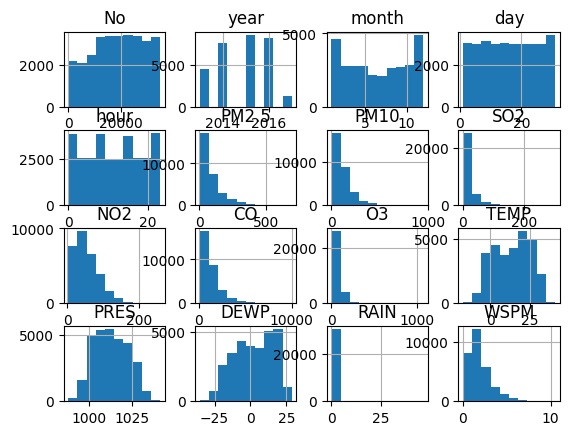

In [128]:
#grafik histogram tiap kolom
df.hist()

In [153]:
#memeriksa statistik berdasarkan kolom temp
temp_description = df['TEMP'].describe()
print(temp_description)

count    30338.000000
mean        13.623338
std         11.223178
min        -16.800000
25%          3.600000
50%         14.600000
75%         23.000000
max         40.400000
Name: TEMP, dtype: float64
count    30338.000000
mean        84.933156
std         85.283368
min          3.000000
25%         22.000000
50%         60.000000
75%        118.000000
max        695.000000
Name: PM2.5, dtype: float64


In [154]:
#memeriksa statistik berdasarkan kolom PM2.5
pm2_5_description = df['PM2.5'].describe()
print(pm2_5_description)

count    30338.000000
mean        84.933156
std         85.283368
min          3.000000
25%         22.000000
50%         60.000000
75%        118.000000
max        695.000000
Name: PM2.5, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren keseluruhan tingkat PM2.5 atau polutan udara lainnya dari Februari 2016 hingga Februari 2017?



In [129]:
#Melakukan filter untuk mengubah tipe menjadi datetime
filter_tanggal = df['tanggal'] = pd.to_datetime(df[['year', 'month', 'day']])
print(filter_tanggal)

0       2013-03-01
1       2013-03-01
5       2013-03-01
6       2013-03-01
7       2013-03-01
           ...    
35059   2017-02-28
35060   2017-02-28
35061   2017-02-28
35062   2017-02-28
35063   2017-02-28
Length: 30338, dtype: datetime64[ns]


In [156]:
#Melakukan filter untuk mengambil sebagian data
filtered_data = df[(df['tanggal'] >= '2016-02-01') & (df['tanggal'] <= '2017-02-28')]
print(filtered_data)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
25608  25609  2016      2    1     0   14.0  23.0  13.0  31.0   800.0  49.0   
25609  25610  2016      2    1     1    8.0  18.0   8.0  26.0   700.0  52.0   
25610  25611  2016      2    1     2   13.0  20.0   7.0  31.0   700.0  35.0   
25611  25612  2016      2    1     3   14.0  20.0   9.0  31.0   500.0  27.0   
25612  25613  2016      2    1     4   12.0  13.0   7.0  31.0   400.0  39.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
25608  25609  2016      2    1     0   14.0  23.0  13.0  31.0  800.0  49.0   
25609  25610  2016      2    1     1    8.0  18.0   8.0  26.0  700.0  52.0   
25610  25611  2016      2    1     2   13.0  20.0   7.0  31.0  700.0  35.0   
25611  25612  2016      2    1     3   14.0  20.0   9.0  31.0  500.0  27.0   
25612  25613  2016      2    1     4   12.0  13.0   7.0  31.0  400.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station    tanggal  
25608  -2.7  1033.6 -19.2   0.0  NNW   2.1  Dongsi 2016-02-01  
25609  -2.8  1033.2 -18.8   0.0   NW   1.7  Dongsi 2016-02-01  
25610  -3.3  1033.0 -18.8   0.0    N   1.6  Dongsi 2016-02-01  
25611  -3.8  1032.7 -18.5   0.0    N   1.4  Dongsi 2016-02-01  
25612  -5.3  1032.3 -18.7   0.0  ENE   1.1  Dongsi 2016-02-01  


<ipython-input-168-572b4cc3e135>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tanggal'] = pd.to_datetime(filtered_data['tanggal'])
<ipython-input-168-572b4cc3e135>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = filtered_data.resample('M').mean()


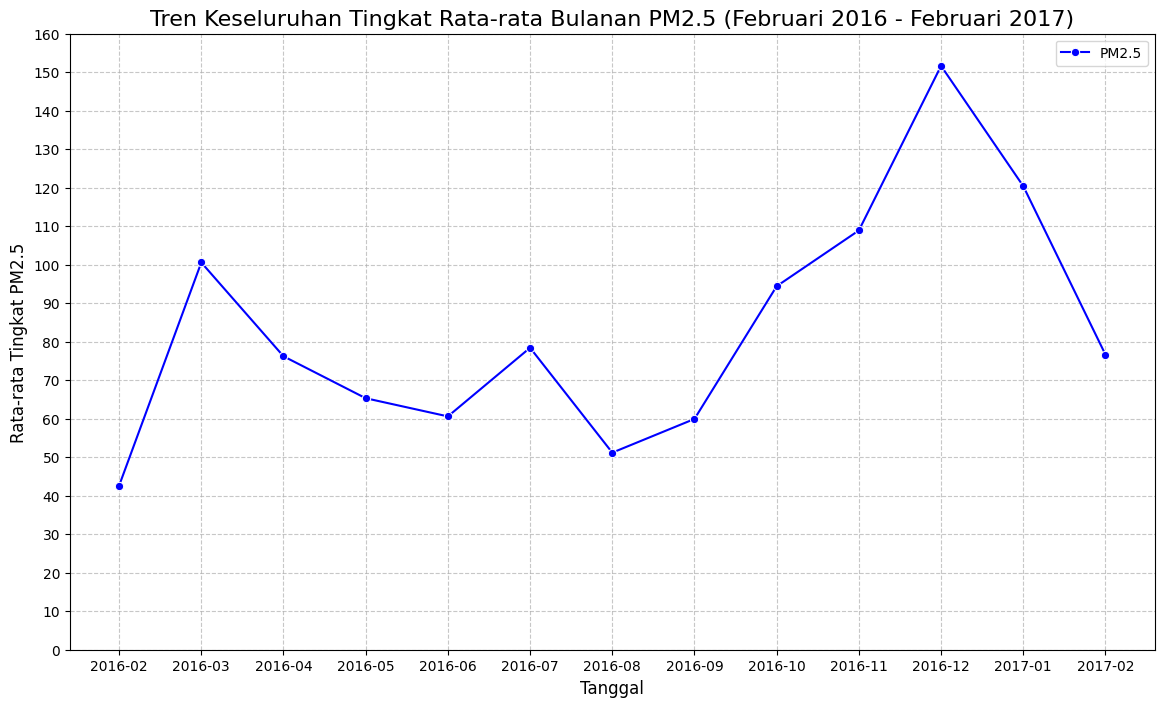

In [168]:
# Melakukan filter untuk mengambil sebagian data
filtered_data = df[(df['tanggal'] >= '2016-02-01') & (df['tanggal'] <= '2017-02-28')]

# Cetak beberapa baris pertama dari DataFrame setelah filter
print(filtered_data.head())

# Pastikan kolom tanggal memiliki tipe data datetime
filtered_data['tanggal'] = pd.to_datetime(filtered_data['tanggal'])

# Set tanggal sebagai indeks
filtered_data.set_index('tanggal', inplace=True)

# Resampling data untuk mendapatkan rata-rata bulanan
monthly_avg = filtered_data.resample('M').mean()

# Plotting Tren Keseluruhan dengan seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_avg.index.strftime('%Y-%m'), y=monthly_avg['PM2.5'], label='PM2.5', color='blue', marker='o')

# Menambahkan elemen desain
plt.title('Tren Keseluruhan Tingkat Rata-rata Bulanan PM2.5 (Februari 2016 - Februari 2017)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rata-rata Tingkat PM2.5', fontsize=12)

plt.legend()

# Menambahkan grid untuk memudahkan membaca
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks(range(0, int(max(monthly_avg['PM2.5'])) + 10, 10))
plt.show()


### Pertanyaan 2:Bagaimana hubungan antara tingkat polusi udara dan faktor cuaca seperti suhu dan kelembaban?

In [ ]:
# Menghitung korelasi antara variabel
correlation_matrix = df[['PM2.5', 'TEMP', 'DEWP']].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)



          PM2.5      TEMP      DEWP
PM2.5  1.000000 -0.137576  0.138007
TEMP  -0.137576  1.000000  0.806634
DEWP   0.138007  0.806634  1.000000


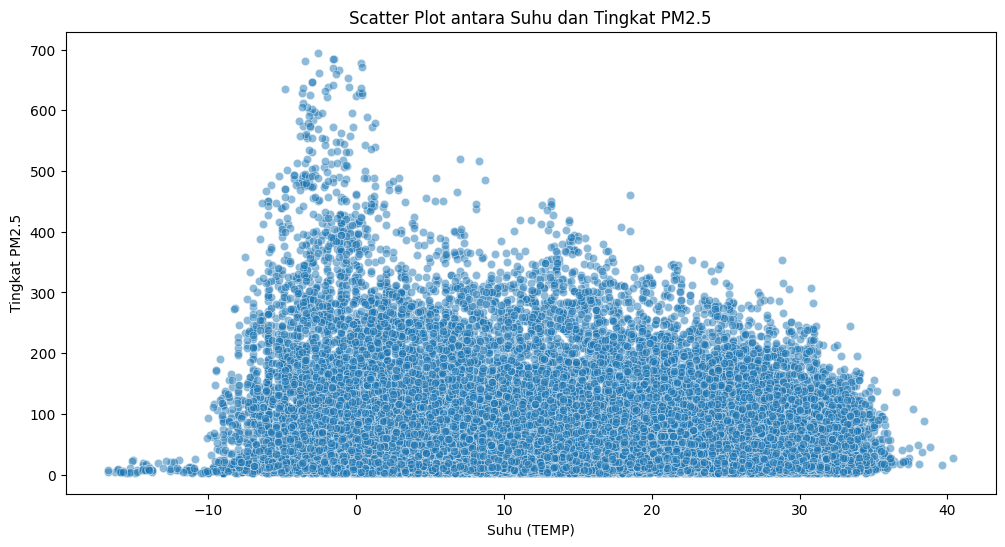

In [ ]:
# Scatter plot antara PM2.5 dan TEMP
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.5)
plt.title('Scatter Plot antara Suhu dan Tingkat PM2.5')
plt.xlabel('Suhu (TEMP)')
plt.ylabel('Tingkat PM2.5')
plt.show()

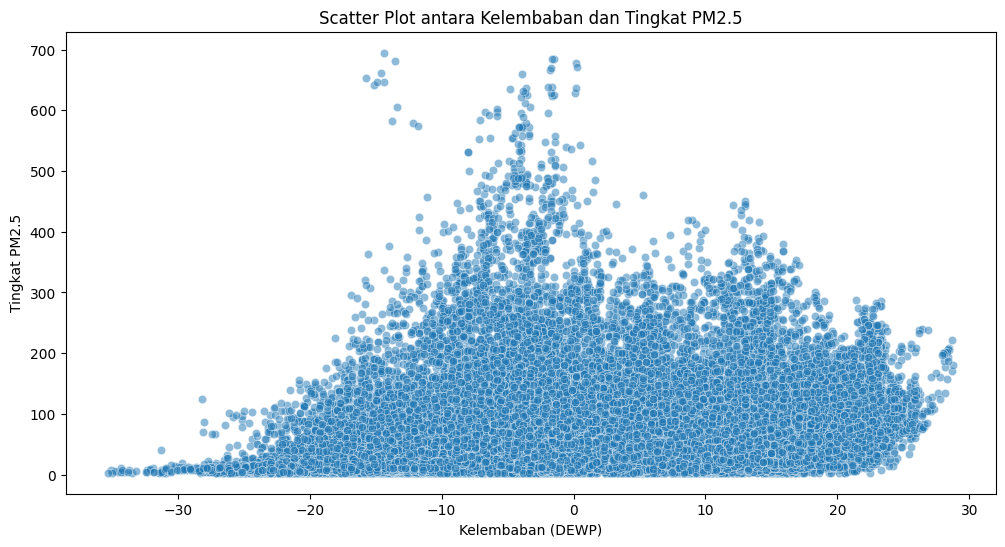

In [132]:
# Scatter plot antara PM2.5 dan DEWP
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DEWP', y='PM2.5', data=df, alpha=0.5)
plt.title('Scatter Plot antara Kelembaban dan Tingkat PM2.5')
plt.xlabel('Kelembaban (DEWP)')
plt.ylabel('Tingkat PM2.5')
plt.show()

## Pertanyaan 3: Bagaimana perubahan suhu sepanjang februari 2016 sampai februari 2017

In [173]:
#Melakukan filter untuk mengambil sebagian data
filtered_data = df[(df['tanggal'] >= '2016-02-01') & (df['tanggal'] <= '2017-02-28')]
print(filtered_data)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
25608  25609  2016      2    1     0   14.0  23.0  13.0  31.0   800.0  49.0   
25609  25610  2016      2    1     1    8.0  18.0   8.0  26.0   700.0  52.0   
25610  25611  2016      2    1     2   13.0  20.0   7.0  31.0   700.0  35.0   
25611  25612  2016      2    1     3   14.0  20.0   9.0  31.0   500.0  27.0   
25612  25613  2016      2    1     4   12.0  13.0   7.0  31.0   400.0  39.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

<ipython-input-174-54d85f0e5e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tanggal'] = pd.to_datetime(filtered_data['tanggal'])


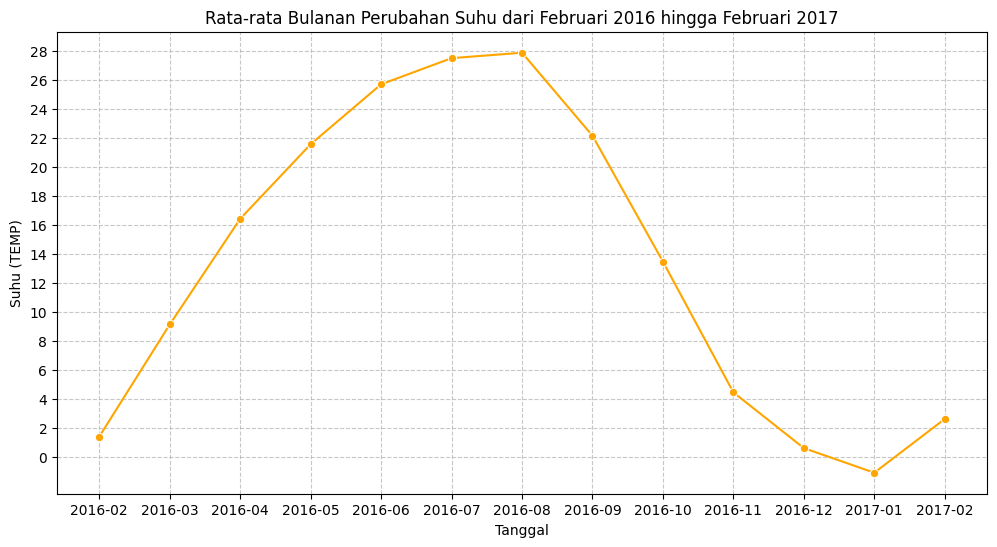

In [174]:
# Pastikan indeks dataframe sudah dalam format datetime
filtered_data['tanggal'] = pd.to_datetime(filtered_data['tanggal'])
filtered_data.set_index('tanggal', inplace=True)

# Resample data suhu bulanan dengan rata-rata
monthly_avg_temp = filtered_data['TEMP'].resample('M').mean()

# Plotting Line dengan Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_temp.index.strftime('%Y-%m'), y=monthly_avg_temp.values, color='orange', marker='o')
plt.title('Rata-rata Bulanan Perubahan Suhu dari Februari 2016 hingga Februari 2017')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (TEMP)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks(range(0, int(max(monthly_avg_temp.values)) + 2, 2))

plt.show()


## Conclusion

- Conclution pertanyaan 1:
Jadi, Selama periode Februari 2016 sampai Februari 2017 peningkatan PM2.5 cenderung meningkat dengan peningkatan paling tinggi ada pada Januari 2017. Selama periode ini juga, tidak terjadi penurunan yang lebih rendah dari Februari 2016
- Conclution pertanyaan 2:
Jadi, hubungan PM2.5 dengan suhu berkorelasi positif, suhu meningkat bersamaan PM2.5. Terdapat pula pola tidak teratur yang bermakna bahwa tidak hanya suhu yang mempengaruhi PM2.5.  Kemudian hubungan PM2.5 dengan kelembapan juga berkorelasi positif, selain suhu, kelembapan juga mempengaruhi akibat tingginya PM2.5
- Concultion pertanyaan 3:
Jadi, selama periode Februari 2016 sampai Februari 2017 terjadi perubahan suhu. Suhu tertinggi terjadi pada 2016-08. Suhu terendah terjadi pada 2017-01 dan suhu 2016-02 dan 2017-02 berbeda, terjadi peningkatan pada 2017-02.